# Ford GoBike System Data Exploration
## Oladimeji Olaniyan 

## Introduction

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the month of February, 2019.

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base_color = sns.color_palette()[0]
import datetime as dt

%matplotlib inline

### Gathering

In [3]:
# loading the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\PC\Documents\GitHub\ALX-T\Project 03 - Data Visualization\Datasets\201902-fordgobike-tripdata.csv')

### Assessing

In [4]:
# we will be focusing our attention on the programmatic assessment of the dataset.
# writing a simple function to return high level overview of data shape and composition
def info(df):
    print(df.shape),
    print('*' *40),
    print(df.info())
    print('*' *40)
    print(df.head())

info(df)

(183412, 16)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  membe

In [5]:
# this returns summary statistics on the numerical variables in the dataset.
df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [6]:
# checking all columns for unique value count
print(df.nunique())

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


### Issues

#### Quality
1. Null Values: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

2. Erroneous Datatype: start_time, end_time, start_station_id, end_station_id, user_type, member_gender, bike_share_for_all_trip.


#### Tidiness

3. We need to separate the start_time and end_time columns into time_of_day, day_of_week and month columns. 

### Cleaning 

In [7]:
# creating a copy of the dataset before cleaning
df_clean = df.copy()

df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Issue 1: Null Values: start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

#### Define

Dataset contains null values which need to be dropped.

#### Code

In [8]:
# test
df_clean.isnull().any().sum()

6

In [9]:
df_clean.dropna(inplace=True)

#### Test

In [10]:
df_clean.isnull().any().sum()

0

#### Issue 2: Erroneous Datatype: start_time, end_time, start_station_id, end_station_id, user_type, member_gender, bike_share_for_all_trip.

#### Define

Columns in the wrong data type will be converted to the appropriate data type.

#### Code

In [11]:
# test
print(df_clean.start_time.dtypes)
print(df_clean.end_time.dtypes)
print(df_clean.start_station_id.dtypes)
print(df_clean.end_station_id.dtypes)
print(df_clean.member_gender.dtypes)
print(df_clean.user_type.dtypes)
print(df_clean.bike_share_for_all_trip.dtypes)

object
object
float64
float64
object
object
object


In [12]:
# we will use the pd.to_datetime function to convert the start_date and end_date columns to date data type
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# converting the rest of the columns with erroneous datatypes
df_clean['start_station_id'] = df_clean.start_station_id.astype(int)
df_clean['end_station_id'] = df_clean.end_station_id.astype(int)
df_clean['member_gender'] = df_clean.member_gender.astype('category')
df_clean['user_type'] =df_clean.user_type.astype('category')
df_clean['bike_share_for_all_trip'] = df_clean.bike_share_for_all_trip.astype('category')

#### Test

In [13]:
print(df_clean.start_time.dtypes)
print(df_clean.end_time.dtypes)
print(df_clean.start_station_id.dtypes)
print(df_clean.end_station_id.dtypes)
print(df_clean.member_gender.dtypes)
print(df_clean.user_type.dtypes)
print(df_clean.bike_share_for_all_trip.dtypes)

datetime64[ns]
datetime64[ns]
int32
int32
category
category
category


#### Issue 3: We need to separate the start_time and end_time columns into time_of_day, day_of_week and month columns.

#### Define

In order to effectively explore certain metrics from the dataset during exploratory analysis, we will need to extract time of day, day of week and month from the start_date and end_date columns.

#### Code

In [14]:
# using the python datetime library, we will extract the needed info into new columns
# start_time
df_clean['start_time_of_day'] = df_clean['start_time'].dt.hour
df_clean['start_day_of_week'] = df_clean['start_time'].dt.day_name()
df_clean['start_month'] = df_clean['start_time'].dt.month_name()

#end_time
df_clean['end_time_of_day'] = df_clean['end_time'].dt.hour
df_clean['end_day_of_week'] = df_clean['end_time'].dt.day_name()
df_clean['end_month'] = df_clean['end_time'].dt.month_name()

#### Test

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?
The dataset originally contained 16 columns and 183,412 rows that provide information on a bike-sharing system covering the greater San Francisco Bay area. This includes the bike ID, start and end time of each bike ride, with another column containing the duration of these bike rides in seconds.<br>
It also contains location information on the stations, such as the ID, name, latitude and longitude of the start and end stations.<br>
And lastly, the dataset also gives us information on the riders such as, the type of user ; whether they are a customer or a subscriber. The gender of the riders, as well as the birth year of the riders. 

However, after assessing and cleaning the dataset, it now contains 22 columns and 174,952 rows. The start_time and end_time columns were further split into 3 new column each which contain the time of day, day of week and month of the start and end times making 22 columns, and rows with null values were dropped reducing the number of rows to 174,952.



### What is/are the main feature(s) of interest in your dataset?
What variables in the dataset have the most effect on ride frequency?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect the features that would have the most effect on ride frequency in the dataset are what hour of the day the ride occurs, and what day of the week the ride occurs. 

Other features that may affect ride frequency include the start stations of the ride, and the end stations of the ride.

## Univariate Exploration

### Question 1: What is the distribution of bike riders based on user type?

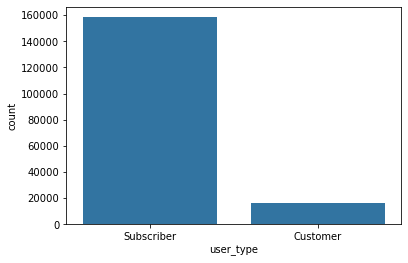

In [19]:
# absolute frequency of user type 
freq = df_clean['user_type'].value_counts()
gen_order = freq.index
sns.countplot(data=df_clean, x='user_type', color=base_color,
             order=gen_order);

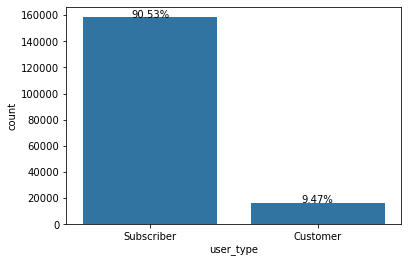

In [28]:
# relative frequency of user type
freq = df_clean['user_type'].value_counts()
gen_order = freq.index
ax = sns.countplot(data = df_clean, x = 'user_type', color = base_color, order = gen_order)

total = len(df_clean)
for p in ax.patches:
    tick_names = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(tick_names, (x, y),ha='center')

plt.show();

### Observation

According to this visualization, 90.53% of all bike riders are Subscribers, with the Customers only making up the remaining 9.47%.

### Question 2: What is the distribution of bike riders based on gender?

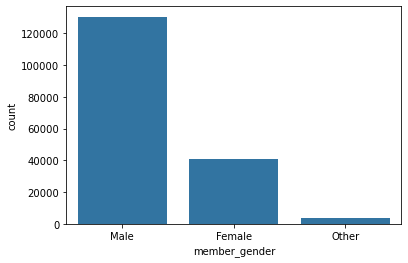

In [30]:
# absolute frequency of member gender
freq = df_clean['member_gender'].value_counts()
gen_order = freq.index
sns.countplot(data=df_clean, x='member_gender', color=base_color,
             order=gen_order);

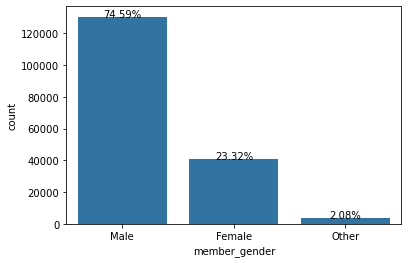

In [37]:
# relative frequency of member gender

freq = df_clean['member_gender'].value_counts()
gen_order = freq.index
ax = sns.countplot(data = df_clean, x = 'member_gender', color = base_color, order = gen_order)

total = len(df_clean)
for p in ax.patches:
    tick_names = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(tick_names, (x, y),ha='center')

plt.show();

### Observation

Males make up 75.59% of all bike riders, females make up 23.32%, and Other makes up the remaining 2.08%.

### Question 3: What is the frequency of bike rides based on time of day?

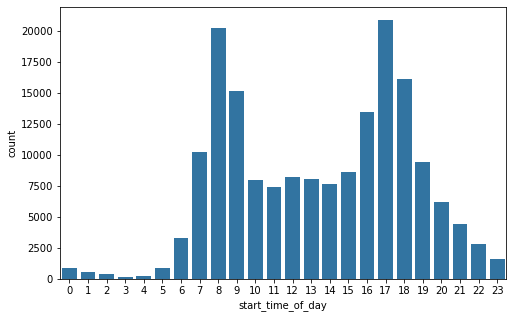

In [21]:
ax = plt.subplots(figsize = [8,5])
sns.countplot(data=df_clean, x='start_time_of_day', color=base_color);

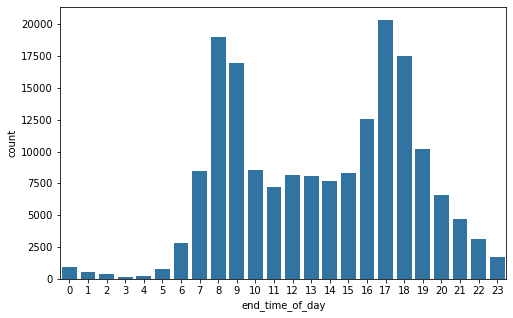

In [23]:
ax = plt.subplots(figsize = [8,5])
sns.countplot(data=df_clean, x='end_time_of_day', color=base_color);

### Observation

As may be observed from the above visualizations, most rides occur at 8am, 9am, 5pm and 6pm. <br>
And the least amount of rides occur at 3am and 4am.

### Question 4: What is the frequency of bike rides based on day of week?

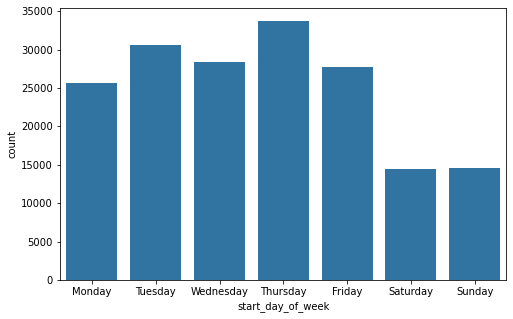

In [33]:
ax = plt.subplots(figsize = [8,5])
sns.countplot(data=df_clean, x='start_day_of_week', color=base_color, 
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']);

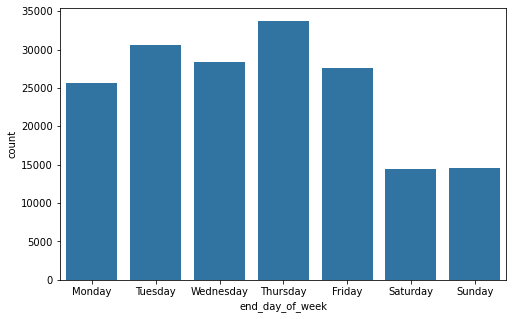

In [35]:
ax = plt.subplots(figsize = [8,5])
sns.countplot(data=df_clean, x='end_day_of_week', color=base_color, 
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']);

### Observatons

Most bike rides occur on Thursday, and the least amount of bike rides occur on Saturday and Sunday.

### Question 5: What stations do most rides occur?

In [55]:
start_loc = df_clean.start_station_name.value_counts().head(10)

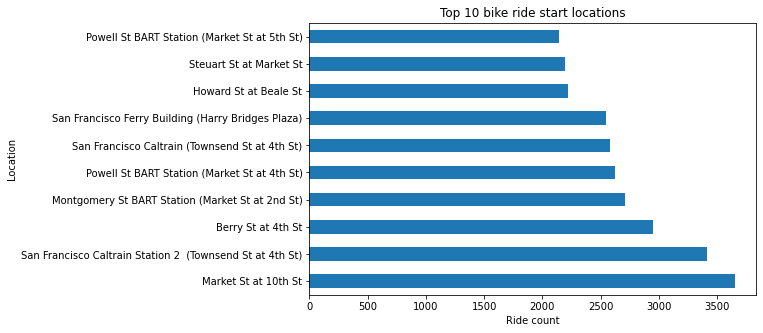

In [56]:
plt.figure(figsize = (8,5))
plt.title("Top 10 bike ride start locations")
start_loc.plot(kind = 'barh')
plt.xlabel('Ride count')
plt.ylabel('Location');

In [57]:
end_loc = df_clean.end_station_name.value_counts().head(10)

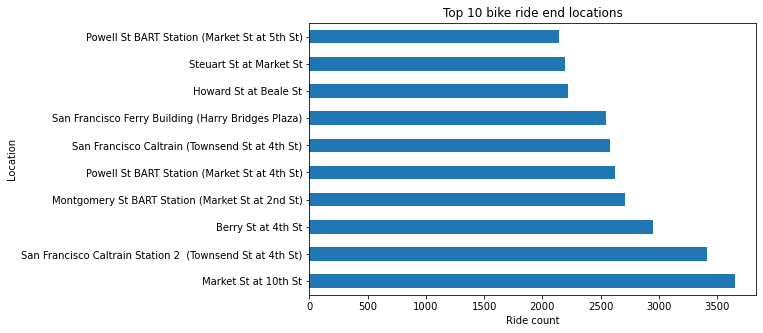

In [58]:
plt.figure(figsize = (8,5))
plt.title("Top 10 bike ride end locations")
start_loc.plot(kind = 'barh')
plt.xlabel('Ride count')
plt.ylabel('Location');

### Observations

Most bike rides seem to start and end at Market Street at 10th Street

## Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

